# Examen 2:  Algorithmes d'apprentissage profond
- 420-A60-BB Neila Mezghani
- Author:  Ricardo Vallejo

### 1. Téléchargez le contenu de la base de données (utilisez tf.keras.datasets.cifar10).

In [152]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the data
cifar10 = tf.keras.datasets.cifar10

### 2. La base de données est répartis en des données d’entrainement et des données de test. Formez les deux sous-ensembles de données x_trainet x_test correspondant respectivement aux données d’entrainementet de test

In [153]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 3. Vérifiez la dimension des données d’entrainement et de test, le nombre de classes et le nombre d’échantillons par classe.


In [154]:
# Shape of données d’entrainement
input_train_shape = x_train.shape
input_train_shape

(50000, 32, 32, 3)

In [155]:
# La dimension de donnes de entrainement est 50000 images, de 32x32 pixels et 3 channels de couleur.

In [156]:
# Shape of données des tests
input_test_shape = x_test.shape
input_test_shape

(10000, 32, 32, 3)

In [157]:
# La dimension de donnes de entrainement est 10000 images, de 32x32 pixels et 3 channels de couleur.

In [158]:
import pandas as pd

Y_traindf = pd.DataFrame(y_train, columns = ['class'])
Y_traindf.groupby('class').size()

class
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [159]:
# Le numero de classes est 10, et ilya 5000 echantillons par class dans le jeux de donnes de entrainement

In [160]:
Y_testdf = pd.DataFrame(y_test, columns = ['class'])
Y_testdf.groupby('class').size()

class
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

In [161]:
# Le numero de classes est 10, et ilya 1000 echantillons par class dans le jeux de donnes de test

### 4. Affichez une dizaine d’échantillons de la base de données

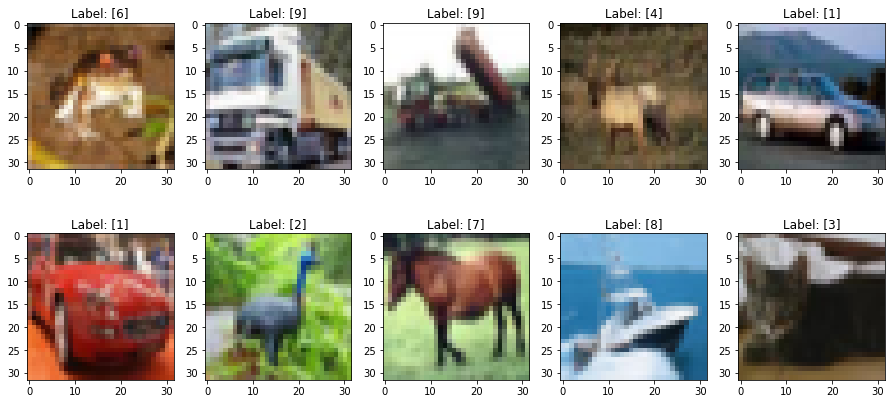

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

# specify the number of rows and columns you want to see
num_row = 2
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,3*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

### 5. Réalisez une standardisation des deux sous-ensembles des données (normalisation des valeurs des pixels)

In [163]:
z_train = x_train.astype('float32') / 255
z_test = x_test.astype('float32') / 255

In [164]:
#one hot encoding pour y, pour utiliser categorical_crossentropy pour la multiclassification.

from keras.utils import np_utils
ymTrain = np_utils.to_categorical(y_train)
ymTest = np_utils.to_categorical(y_test)

In [165]:
# Verification
ymTest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [166]:
ymTest.shape  # Verification de 10 columns, une pour chaque class

(10000, 10)

### 6. Construisez une réseau de neurone convolutif (CNN) ayant l’architecture suivante :

- Utilisez trois filtres (couches de convolution) de dimension 3 qui
progressent selon les couches selon : 32, puis 64, puis 128.
- Utilisez une normalisation par Batch après chaque couche de convolution et un maxPooloing de taille 2
- Utilisez la fonction d’activation relu et un padding=’same’.
- Utilisez ensuite le réseau intégralement connecté, constitué d’une couche dense de taille 1024
- Utilisez également un dropout avec un taux d’extinction de 20%

In [167]:
# Create model
model = tf.keras.models.Sequential()

# 3 Couches de convolution et normalisation par Batch après chaque couche de convolution
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME")),
tf.keras.layers.BatchNormalization(),
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))),

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding="SAME")),
tf.keras.layers.BatchNormalization(),
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))),

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding="SAME"))
tf.keras.layers.BatchNormalization(),
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))),

# réseau intégralement connecté, constitué d’une couche dense de taille 1024
model.add(tf.keras.layers.Flatten()),
model.add(tf.keras.layers.Dense(1024, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(10, activation='softmax'))


### 7. Affichez le sommaire du modèle

In [168]:
# Sommaire du modèle B
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)             

### 8. En utilisant l’optimisation adam, entrainez le CNN sur le jeu de données d’entrainement de CIFAR10 pendant 50 époques. La métrique utilisée étant la valeur de l’accuracy.

In [169]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(z_train, ymTrain, shuffle=True, epochs=50, validation_data=(z_test, ymTest))


Epoch 1/50
1563/1563 [==============================] - 125s 76ms/step - loss: 1.3233 - accuracy: 0.5230 - val_loss: 0.9983 - val_accuracy: 0.6474
Epoch 2/50
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9073 - accuracy: 0.6789 - val_loss: 0.8586 - val_accuracy: 0.6996
Epoch 3/50
1563/1563 [==============================] - 119s 76ms/step - loss: 0.7358 - accuracy: 0.7416 - val_loss: 0.7857 - val_accuracy: 0.7285
Epoch 4/50
1563/1563 [==============================] - 117s 75ms/step - loss: 0.6092 - accuracy: 0.7867 - val_loss: 0.7426 - val_accuracy: 0.7511
Epoch 5/50
1563/1563 [==============================] - 120s 77ms/step - loss: 0.4935 - accuracy: 0.8249 - val_loss: 0.7931 - val_accuracy: 0.7404
Epoch 6/50
1563/1563 [==============================] - 115s 73ms/step - loss: 0.3952 - accuracy: 0.8618 - val_loss: 0.7741 - val_accuracy: 0.7567
Epoch 7/50
1563/1563 [==============================] - 107s 68ms/step - loss: 0.3113 - accuracy: 0.8912 - val_loss: 0

### 9. Représentez la matrice de confusion sur les données de test. Commentez les résultats

### 9.1. Prediction

In [180]:
# Prédiction sur l'ensemble des données de test
yPred = model.predict(z_test)
print(yPred.shape)

(10000, 10)


In [181]:
yPred

array([[3.88e-14, 1.34e-14, 9.35e-15, ..., 1.14e-15, 1.09e-08, 7.11e-19],
       [9.19e-13, 9.97e-01, 4.84e-37, ..., 0.00e+00, 3.01e-03, 3.21e-21],
       [8.77e-02, 1.57e-07, 2.37e-12, ..., 5.67e-11, 9.12e-01, 1.56e-04],
       ...,
       [0.00e+00, 0.00e+00, 5.15e-28, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.21e-16, 1.00e+00, 2.42e-23, ..., 2.25e-26, 8.30e-23, 1.89e-28],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]],
      dtype=float32)

In [182]:
import numpy

iYPred = numpy.argmax(yPred,axis=1)
iYPred

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

### 9.2. Verification de l'approche et de resultat pour une image.

In [183]:
iYPred.shape

(10000,)

In [194]:
# Verification 3e image de set

# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck
    
# Affichage de la première ligne, la prediction correspondent cest la class 8 (ship)
# Le valeur max cest 1 dans la position de la class 8

print(yPred[2,:]) #---> Class 8 --> ship

[8.77e-02 1.57e-07 2.37e-12 5.00e-13 3.38e-14 2.47e-13 3.78e-10 5.67e-11
 9.12e-01 1.56e-04]


In [195]:
iYPredx = numpy.argmax(yPred[2,:])
iYPredx

8

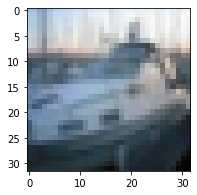

In [202]:
# pick le image 3
sample = 2
image = x_test[sample]

fig = plt.figure(figsize = (3,3))
plt.imshow(image)
plt.show()

## oh yeah :)  La prediction est correct.

### 9.3. Matrix de confusion

In [186]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=iYPred)
np.set_printoptions(precision=2)
cnf_matrix 

array([[806,  17,  53,  10,  17,  10,  13,  11,  41,  22],
       [ 14, 877,   6,   6,   5,   1,  10,   3,  14,  64],
       [ 58,   7, 677,  34,  52,  62,  66,  23,  13,   8],
       [ 23,  14,  78, 500,  51, 157, 117,  31,  14,  15],
       [ 19,   1, 113,  51, 648,  43,  64,  55,   4,   2],
       [ 18,   3,  52, 126,  41, 644,  60,  40,   6,  10],
       [  3,   6,  51,  42,  17,  14, 854,   3,   5,   5],
       [ 15,   2,  39,  34,  49,  57,  15, 771,   3,  15],
       [ 78,  45,  10,  15,   7,   7,  10,   3, 790,  35],
       [ 28,  97,  14,  13,   6,   7,   4,  10,  18, 803]], dtype=int64)

### 9.4. Matrix de confusion normalize

Pour faciliter l'interpretation de resultats


In [187]:
cnf_matrixN = confusion_matrix(y_true=y_test, y_pred=iYPred, normalize='true')
np.set_printoptions(precision=2)
cnf_matrixN 

array([[0.81, 0.02, 0.05, 0.01, 0.02, 0.01, 0.01, 0.01, 0.04, 0.02],
       [0.01, 0.88, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.06],
       [0.06, 0.01, 0.68, 0.03, 0.05, 0.06, 0.07, 0.02, 0.01, 0.01],
       [0.02, 0.01, 0.08, 0.5 , 0.05, 0.16, 0.12, 0.03, 0.01, 0.01],
       [0.02, 0.  , 0.11, 0.05, 0.65, 0.04, 0.06, 0.06, 0.  , 0.  ],
       [0.02, 0.  , 0.05, 0.13, 0.04, 0.64, 0.06, 0.04, 0.01, 0.01],
       [0.  , 0.01, 0.05, 0.04, 0.02, 0.01, 0.85, 0.  , 0.01, 0.01],
       [0.01, 0.  , 0.04, 0.03, 0.05, 0.06, 0.01, 0.77, 0.  , 0.01],
       [0.08, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.79, 0.04],
       [0.03, 0.1 , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.02, 0.8 ]])

In [188]:
# Analysis:

# Diagonal represents le taux de classification pour chaque class, la class que mieux a ete predit est 
# la class 1 (Autombile), avec 88% correctement classifie. Par contre la class avec plus des erreurs est 
# la class 3 (cat), avec 50% correctement classifie.

# On observe que ilya confusion dans l<algorithme pour classifier le chats, l<algorithme prendre 13% de 
# chats comme class 5 (dogs), la meme observation on peut faire, que pour les chiennes on a une taux de 
# classification correct de 64% et ilya confusion avec les chats de 16%.



### 9.4. Classification_report

Pour faciliter la comparation des modeles

In [217]:
print(classification_report(y_true=y_test, y_pred=iYPred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.82      0.88      0.85      1000
           2       0.62      0.68      0.65      1000
           3       0.60      0.50      0.55      1000
           4       0.73      0.65      0.68      1000
           5       0.64      0.64      0.64      1000
           6       0.70      0.85      0.77      1000
           7       0.81      0.77      0.79      1000
           8       0.87      0.79      0.83      1000
           9       0.82      0.80      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



### 10. Représentez la courbe de variation de la fonction perte sur les données d’entrainement et de test.

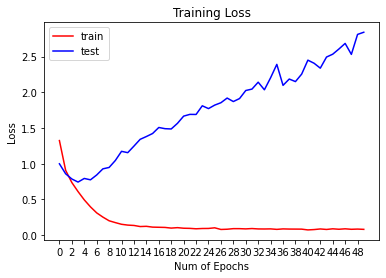

In [190]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xticks(np.arange(0, 50, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend(['train', 'test'])

In [ ]:
# De la courve d'Apprentissage on peut deduire une overfitting, ou le modele est capable de classifier tres bien 
# les donnes de entrenainment mais il est pas capable de le faire pour les nouvelles donnes.
# cest une situation indeserable et plus critique parce que le point d inflection est dans les premieres epoches.

### 11. Construisez un RNP dense constitué de 10 couches cachées, chacune avec 100 neurones. Utilisez l’initialisation de He et la fonction d’activation ELU

In [191]:
model_B = tf.keras.models.Sequential()
model_B.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for x in range(10):
    model_B.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model_B.add(tf.keras.layers.Activation("elu"))
    
model_B.add(tf.keras.layers.Dense(10, activation="softmax"))

### 12. En utilisant l’optimisation Nadam (learning_rate=5e-5), entrainez le RNP sur le jeu de données d’entrainement CIFAR10 pendant 50 époques. La métrique utilisée étant l’accuracy

In [192]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model_B.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history2 = model_B.fit(z_train, ymTrain, epochs=50, validation_data=(z_test, ymTest))

Epoch 1/50
1563/1563 [==============================] - 29s 13ms/step - loss: 1.8692 - accuracy: 0.3265 - val_loss: 1.7231 - val_accuracy: 0.3793
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6635 - accuracy: 0.4044 - val_loss: 1.6146 - val_accuracy: 0.4220
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5760 - accuracy: 0.4378 - val_loss: 1.5625 - val_accuracy: 0.4439
Epoch 4/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5210 - accuracy: 0.4579 - val_loss: 1.5230 - val_accuracy: 0.4590
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4799 - accuracy: 0.4719 - val_loss: 1.5183 - val_accuracy: 0.4603
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4466 - accuracy: 0.4822 - val_loss: 1.4980 - val_accuracy: 0.4712
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4183 - accuracy: 0.4934 - val_loss: 1.4607 -

### 13. Représentez la matrice de confusion. Commentez les résultats.

### 13.1. Prediction

In [203]:
# Prédiction sur l'ensemble des données de test
yPredB = model_B.predict(z_test)
print(yPredB.shape)

(10000, 10)


In [204]:
import numpy

iYPredB = numpy.argmax(yPredB,axis=1)
iYPredB

array([3, 8, 8, ..., 2, 4, 7], dtype=int64)

### 13.2. Verification de l'approche et de resultat pour une image.

In [205]:
iYPredB.shape

(10000,)

In [209]:
# Verification 3e image de set

# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck
    
# Affichage de la première ligne, la prediction correspondent cest la class 8 (ship)
# Le valeur max cest 1 dans la position de la class 8

print(yPredB[2,:]) #---> Class 8 --> ship

[4.36e-01 1.44e-02 2.10e-03 3.45e-04 2.98e-04 7.59e-04 1.41e-05 2.64e-04
 5.17e-01 2.82e-02]


In [210]:
iYPredx = numpy.argmax(yPredB[1,:])
iYPredx

8

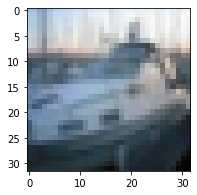

In [212]:
# pick le 3e image
sample = 2
image = x_test[sample]

fig = plt.figure(figsize = (3,3))
plt.imshow(image)
plt.show()

## oh yeah :)  La prediction est correct.

### 13.3. Matrix de confusion

In [218]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrixB = confusion_matrix(y_true=y_test, y_pred=iYPredB)
np.set_printoptions(precision=2)
cnf_matrixB

array([[615,  21,  56,  19,  30,  19,  21,  19, 161,  39],
       [ 65, 572,  19,  25,  12,  17,  16,  18, 107, 149],
       [ 83,  14, 392,  82, 152,  91,  76,  62,  30,  18],
       [ 39,  21,  91, 318,  86, 245,  90,  41,  36,  33],
       [ 58,  12, 121,  53, 476,  68,  88,  76,  36,  12],
       [ 23,   8,  88, 175,  85, 458,  52,  51,  32,  28],
       [  7,  15,  93,  83, 110,  79, 566,  13,  19,  15],
       [ 46,  11,  66,  54,  93,  88,  18, 546,  27,  51],
       [ 87,  45,   9,  21,  17,  25,   9,   9, 744,  34],
       [ 52, 142,  16,  35,   9,  22,  24,  42, 131, 527]], dtype=int64)

### 13.4. Matrix de confusion normalize

Pour faciliter l'interpretation de resultats

In [219]:
cnf_matrixNB = confusion_matrix(y_true=y_test, y_pred=iYPredB, normalize='true')
np.set_printoptions(precision=2)
cnf_matrixNB

array([[0.61, 0.02, 0.06, 0.02, 0.03, 0.02, 0.02, 0.02, 0.16, 0.04],
       [0.07, 0.57, 0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.11, 0.15],
       [0.08, 0.01, 0.39, 0.08, 0.15, 0.09, 0.08, 0.06, 0.03, 0.02],
       [0.04, 0.02, 0.09, 0.32, 0.09, 0.24, 0.09, 0.04, 0.04, 0.03],
       [0.06, 0.01, 0.12, 0.05, 0.48, 0.07, 0.09, 0.08, 0.04, 0.01],
       [0.02, 0.01, 0.09, 0.17, 0.09, 0.46, 0.05, 0.05, 0.03, 0.03],
       [0.01, 0.01, 0.09, 0.08, 0.11, 0.08, 0.57, 0.01, 0.02, 0.01],
       [0.05, 0.01, 0.07, 0.05, 0.09, 0.09, 0.02, 0.55, 0.03, 0.05],
       [0.09, 0.04, 0.01, 0.02, 0.02, 0.03, 0.01, 0.01, 0.74, 0.03],
       [0.05, 0.14, 0.02, 0.04, 0.01, 0.02, 0.02, 0.04, 0.13, 0.53]])

In [ ]:
# Analysis:

# Diagonal represents le taux de classification pour chaque class, la class que mieux a ete predit est 
# la class 8 (Ship), avec 74% correctement classifie. Par contre la class avec plus des erreurs est 
# la class 3 (cat), avec 32% correctement classifie.

# On observe que ilya confusion dans l'algorithme pour classifier les chats, l'algorithme prendre 17% de 
# chats comme class 5 (dogs), la meme observation on peut faire, que pour les chiennes on a une taux de 
# classification correct de 46% et ilya confusion avec les chats de 24%.


### 13.4. Classification_report

Pour faciliter la comparation des modeles

In [215]:
print(classification_report(y_true=y_test, y_pred=iYPredB))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1000
           1       0.66      0.57      0.61      1000
           2       0.41      0.39      0.40      1000
           3       0.37      0.32      0.34      1000
           4       0.44      0.48      0.46      1000
           5       0.41      0.46      0.43      1000
           6       0.59      0.57      0.58      1000
           7       0.62      0.55      0.58      1000
           8       0.56      0.74      0.64      1000
           9       0.58      0.53      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



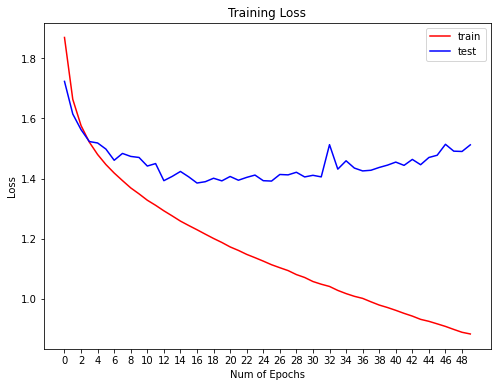

In [216]:
plt.figure(1)
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.xticks(np.arange(0, 50, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend(['train', 'test'])

In [220]:
# De la courve d'Apprentissage on peut deduire une overfitting, ou le modele est capable de classifier tres bien 
# les donnes de entrenainment mais il est pas capable de le faire pour les nouvelles donnes.
# cest une situation indeserable et plus critique parce que le point d inflection est dans les premieres epoches.

# Aussi on peut observer que on a arrete le entrainment de facon premature, avec plus des epoches on pourrait ameliorer
# le comportement de set de entrainement.


### 14. Comparez les deux modèles CNN et RNP obtenus et commentez les résultats.


In [226]:
# Pour le modele CNN on a uen taux de classification globale de 74% et pour RNP 52%
# Les deux models ont comportement de overfiting, sont capables de bien classifier les donnes 
# de training (CNN mieux que RNP), 
# mais ne sont pas bonnes pour classifier les nouvelles donnes.
# Les deux modeles present de confusion entre les chats et les chiennes.


In [227]:
test_eval = model.evaluate(z_test, ymTest, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.8400843143463135
Test accuracy: 0.7369999885559082


In [228]:
test_evalB = model_B.evaluate(z_test, ymTest, verbose=0)
print('Test loss:', test_evalB[0])
print('Test accuracy:', test_evalB[1])


Test loss: 1.5120548009872437
Test accuracy: 0.521399974822998
